In [ ]:
import numpy as np
import pandas as pd
import gym
env = gym.make('CartPole-v1')
obs = env.reset()
print("obersevation space: ",env.observation_space)
print("action space: ", env.action_space)

for _ in range(100):
  action = env.action_space.sample()
  obs, reward, done, info = env.step(action)
  if done:
    break
env.close()

import numpy as np

states = [1, 2]
actions = [0, 1]
num_states = len(states)
num_actions = len(actions)
transition_prob = np.array([[[0.7, 0.3], [0.2, 0.8]],
                            [[0.4, 0.6], [0.1, 0.9]],
                            [[0.5, 0.5], [0.3, 0.7]]])

rewards = np.array([[5, 2], [1, 3], [4, 0]])

initial_state = 0
trajectory = [initial_state]
total_rewards = 0

for _ in range(5):
    action = np.random.choice(actions)
    print(states)
    print(transition_prob[trajectory[-1]])
    next_state =np.random.choice(states, p=transition_prob[trajectory[-1]][action])
    reward = rewards[trajectory[-1]][action]
    total_rewards += reward
    trajectory.append(next_state)

print("trajectory:", trajectory)
print("total_reward:", total_rewards)



obersevation space:  Box([-4.8000002e+00 -3.4028235e+38 -4.1887903e-01 -3.4028235e+38], [4.8000002e+00 3.4028235e+38 4.1887903e-01 3.4028235e+38], (4,), float32)
action space:  Discrete(2)
[1, 2]
[[0.7 0.3]
 [0.2 0.8]]
[1, 2]
[[0.5 0.5]
 [0.3 0.7]]
[1, 2]
[[0.4 0.6]
 [0.1 0.9]]
[1, 2]
[[0.5 0.5]
 [0.3 0.7]]
[1, 2]
[[0.5 0.5]
 [0.3 0.7]]
trajectory: [0, 2, 1, 2, 2, 2]
total_reward: 13


In [ ]:
import numpy as np
import pandas as pd
from sklearn import datasets
from math import log2
from sklearn.model_selection import train_test_split
import torch.nn.init as init

In [ ]:
def entropy(data):
    unique_values, counts = np.unique(data, return_counts=True)
    probabilities = counts / len(data)
    return -sum(p * log2(p) for p in probabilities)

def information_gain(data, attribute, target):
    unique_values = np.unique(data[attribute])
    total_entropy = entropy(data[target])
    weighted_entropy = sum(len(data[data[attribute] == value]) / len(data) * entropy(data[data[attribute] == value][target]) for value in unique_values)
    return total_entropy - weighted_entropy

def build_tree(data, target, attributes):
    if len(np.unique(data[target])) == 1:
        return data[target].iloc[0]

    if len(attributes) == 0:
        most_common_target = data[target].mode().iloc[0]
        return most_common_target

    information_gains = {}
    for attribute in attributes:
        information_gains[attribute] = information_gain(data, attribute, target)

    best_attribute = max(information_gains, key=information_gains.get)

    branches = {}
    for value in np.unique(data[best_attribute]):
        subset = data[data[best_attribute] == value].drop(columns=[best_attribute])
        if len(subset) == 0:
            most_common_target = data[target].mode().iloc[0]
            branches[value] = most_common_target
        else:
            new_attributes = [attr for attr in attributes if attr != best_attribute]
            branches[value] = build_tree(subset, target, new_attributes)

    return {best_attribute: branches}
def predict(tree, instance):
    if not isinstance(tree, dict):
        return tree

    attribute_value = instance[list(tree.keys())[0]]
    if attribute_value in tree[list(tree.keys())[0]]:
        return predict(tree[list(tree.keys())[0]][attribute_value], instance)
    else:
        return None

iris = datasets.load_iris()
data = pd.DataFrame(data=np.c_[iris['data'], iris['target']], columns=iris['feature_names'] + ['target'])

target = 'target'
train_data, test_data, train_target, test_target = train_test_split(data.drop(columns=[target]), data[target], test_size=0.2, random_state=42)

attributes = list(train_data.columns)
decision_tree = build_tree(pd.concat([train_data, train_target], axis=1), target, attributes)
new_instance = {'sepal length (cm)': 7.0, 'sepal width (cm)': 3.5, 'petal length (cm)': 1.5, 'petal width (cm)': 0.2}
prediction = predict(decision_tree, new_instance)
print(f"Prediction: {int(prediction)} (Class {iris['target_names'][int(prediction)]})")



Prediction: 0 (Class setosa)


Streaming output truncated to the last 5000 lines.
64
64
64
64
64
64
64
64
64
64
64
64
64
64
64
64
64
64
64
64
64
64
64
64
64
64
64
64
64
64
64
64
64
64
64
64
64
64
64
64
64
64
64
64
64
64
64
64
64
64
64
64
64
64
64
64
64
64
64
64
64
64
64
64
64
64
64
64
64
64
64
64
64
64
64
64
64
64
64
64
64
64
64
64
64
64
64
64
64
64
64
64
64
64
64
64
64
64
64
64
64
64
64
64
64
64
64
64
64
64
64
64
64
64
64
64
64
64
64
64
64
64
64
64
64
64
64
64
64
64
64
64
64
64
64
64
64
64
64
64
64
64
64
64
64
64
64
64
[2/5][400/938] Loss_D: 1.4538 Loss_G: 0.7564 D(x): 0.4937 D(G(z)): 0.4937 / 0.4937
64
64
64
64
64
64
64
64
64
64
64
64
64
64
64
64
64
64
64
64
64
64
64
64
64
64
64
64
64
64
64
64
64
64
64
64
64
64
64
64
64
64
64
64
64
64
64
64
64
64
64
64
64
64
64
64
64
64
64
64
64
64
64
64
64
64
64
64
64
64
64
64
64
64
64
64
64
64
64
64
64
64
64
64
64
64
64
64
64
64
64
64
64
64
64
64
64
64
64
64
64
64
64
64
64
64
64
64
64
64
64
64
64
64
64
64
64
64
64
64
64
64
64
64
64
64
64
64
64
64
64
64
64
64
64
64
64
64
64
64
64

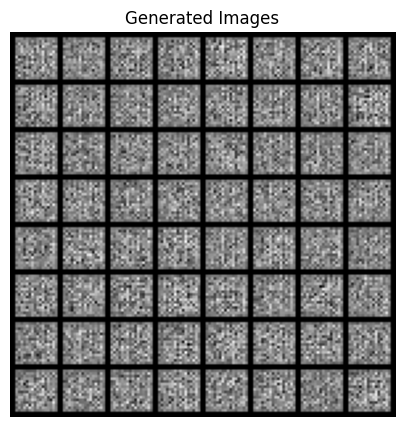

In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.nn import init
import torchvision.transforms as transforms
from torchvision import datasets
from torch.utils.data import DataLoader
import torchvision.utils as vutils
import matplotlib.pyplot as plt
import numpy as np

# Set random seed for reproducibility
manual_seed = 42
torch.manual_seed(manual_seed)

# Define hyperparameters
batch_size = 64
image_size = 64
channels = 1
z_dim = 100
lr = 0.0002
beta1 = 0.5

# Create generator and discriminator
class Generator(nn.Module):
    def __init__(self):
        super(Generator, self).__init__()
        self.main = nn.Sequential(
            nn.ConvTranspose2d(z_dim, 256, 4, 1, 0, bias=False),
            nn.BatchNorm2d(256),
            nn.ReLU(True),
            nn.ConvTranspose2d(256, 128, 4, 2, 1, bias=False),
            nn.BatchNorm2d(128),
            nn.ReLU(True),
            nn.ConvTranspose2d(128, channels, 4, 2, 1, bias=False),
            nn.Tanh()
        )

    def forward(self, input):
        return self.main(input)

class Discriminator(nn.Module):
    def __init__(self):
        super(Discriminator, self).__init__()
        self.main = nn.Sequential(
            nn.Conv2d(channels, 128, 4, 2, 1, bias=False),
            nn.LeakyReLU(0.2, inplace=True),
            nn.Conv2d(128, 256, 4, 2, 1, bias=False),
            nn.BatchNorm2d(256),
            nn.LeakyReLU(0.2, inplace=True),
            nn.Conv2d(256, 1, 4, 1, 0, bias=False),
            nn.Sigmoid()
        )

    def forward(self, input):
        return self.main(input)

# Initialize generator and discriminator
netG = Generator()
netD = Discriminator()

def weights_init(m):
    classname = m.__class__.__name__
    if classname.find('Conv') != -1:
        init.normal_(m.weight.data, 0.0, 0.02)
    elif classname.find('BatchNorm') != -1:
        init.normal_(m.weight.data, 1.0, 0.02)
        init.constant_(m.bias.data, 0)

# Initialize weights
netG.apply(weights_init)
netD.apply(weights_init)

# Create data loader
transform = transforms.Compose([
    transforms.Resize(image_size),
    transforms.ToTensor(),
    transforms.Normalize((0.5,), (0.5,))
])

dataset = datasets.MNIST(root='./data', train=True, download=True, transform=transform)
dataloader = DataLoader(dataset, batch_size=batch_size, shuffle=True, num_workers=2)

# Set up loss function and optimizers
criterion = nn.BCELoss()
optimizerG = optim.Adam(netG.parameters(), lr=lr, betas=(beta1, 0.999))
optimizerD = optim.Adam(netD.parameters(), lr=lr, betas=(beta1, 0.999))

# Training loop
num_epochs = 5
CUDA = False
device = torch.device("cuda:0" if CUDA else "cpu")

netG = Generator().to(device)
netG.apply(weights_init)
print(netG)

netD = Discriminator().to(device)
netD.apply(weights_init)
print(netD)

num_epochs = 5
device = torch.device("cuda:0" if CUDA else "cpu")

fixed_noise = torch.randn(batch_size, z_dim, 1, 1, device=device)
img_list = []

for epoch in range(num_epochs):
    for i, data in enumerate(dataloader, 0):
        # Update discriminator
        netD.zero_grad()
        real_data = data[0].to(device)
        b_size = real_data.size(0)
        label = torch.full((b_size,), 1.0, device=device)
        output = netD(real_data).view(-1)

        # Ensure label has the correct size for comparison

        noise = torch.randn(b_size, z_dim, 1, 1, device=device)
        fake_data = netG(noise)
        label.fill_(0.0)
        output = netD(fake_data.detach()).view(-1)
        errD_real = criterion(output, label.float().view(-1))  # Convert label to float and reshape
        errD_fake = criterion(output, label)
        errD_fake.backward()
        D_G_z1 = output.mean().item()
        errD = errD_real + errD_fake
        optimizerD.step()

        # Update generator
        netG.zero_grad()
        label.fill_(1.0)
        output = netD(fake_data).view(-1)
        errG = criterion(output, label)
        errG.backward()
        D_x = output.mean().item()  # Store the mean of the output
        D_G_z2 = output.mean().item()
        optimizerG.step()

        # Print statistics
        if i % 100 == 0:
            print('[%d/%d][%d/%d] Loss_D: %.4f Loss_G: %.4f D(x): %.4f D(G(z)): %.4f / %.4f'
                  % (epoch, num_epochs, i, len(dataloader),
                     errD.item(), errG.item(), D_x, D_G_z1, D_G_z2))

    # Save generated images
    with torch.no_grad():
        fake = netG(fixed_noise).detach().cpu()
    img_list.append(vutils.make_grid(fake, padding=2, normalize=True))

# Plot the generated images
plt.figure(figsize=(10, 5))
plt.axis("off")
plt.title("Generated Images")
plt.imshow(np.transpose(img_list[-1], (1, 2, 0)))
plt.show()
